# EEE3092F Assignment 3 - AM Lab Simulations

#### PLAGIARISM STATEMENT

I certify that this assignment/report is my own work, based on my personal
study and/or research and that I have acknowledged all material and sources
used in its preparation, and that I
have not copied in part or whole or otherwise plagiarised the work of other
students and/or persons.

Name: Nkosinathi Ntuli (NTLNKO007)

Date: 20 May 2022

In [1]:
using Pkg;

In [ ]:
Pkg.add(["Plots", "PlotlyBase"]);

In [32]:
using FFTW
using Plots
#plotly();
# commenting out plotly and use gr to reduce the file size for submission
gr();

In [33]:
default(size=(700,350)); # Plot canvas size
default(label=""); # Turn off legends
default(ticks=:native); # 

## Show simulations for the DSB-SC case (fm = 1 kHz & fc = 20 kHz)

Modulating waveform: x(t) = cos(2πfmt) where fm=1 kHz.  
Carrier wave oscillator: cos(2πfct) where fc=20 kHz.   
Modulated carrier wave signal: ϕ(t) = f(t)cos(2πfct)  
Demodulated carrier wave:  ϕ(t)cos(2πfct)  
Fitered waveform: y(t) = rect(t/T)ϕ(t)cos(2πfct)  


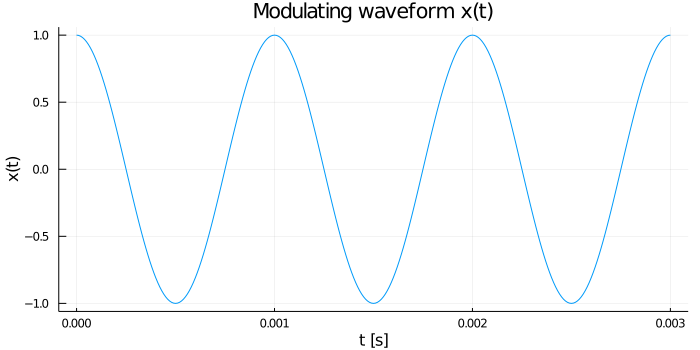

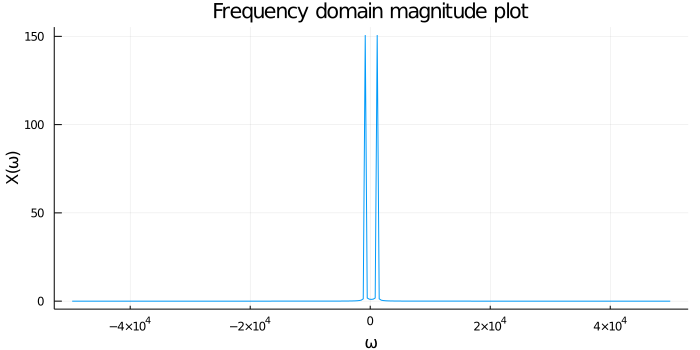

In [34]:
# for the modulating waveform fm = 1kHz 

fs = 100e3
fm=1e3
fc=20e3

Δt = 1/fs
tmax = 3/fm
t = 0:Δt:tmax

xm = cos.(2π*fm.*t)

fig = plot(t, xm, 
    title = "Modulating waveform x(t)",  
    ylabel = "x(t)", 
    xlabel = "t [s]")

display(fig);


# in the freq domain
XM = fft(xm)

N = length(t)
Δf = fs/N
ω = (-fs/2+Δf):Δf:(fs/2)

fig = plot(ω, fftshift(abs.(XM)), 
    title = "Frequency domain magnitude plot",  
    ylabel = "X(ω)", 
    xlabel = "ω")

display(fig);

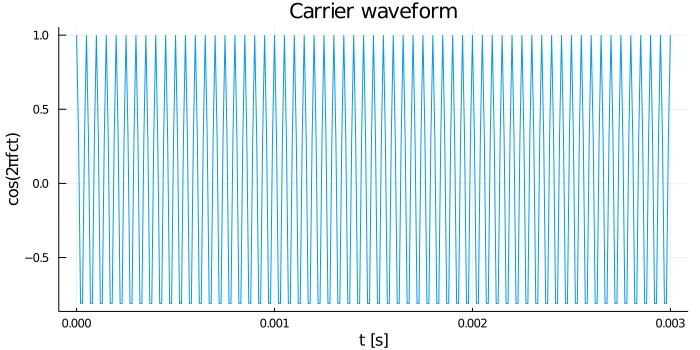

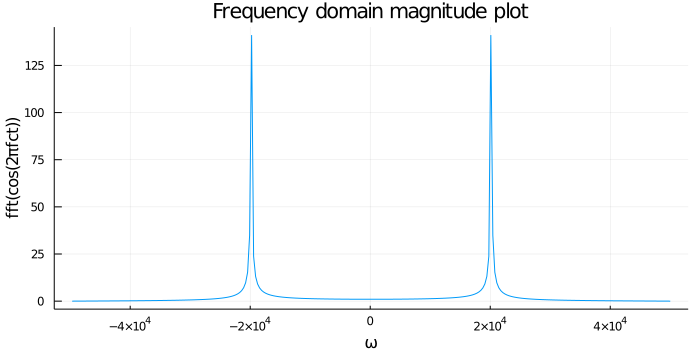

In [35]:
# for the carrier waveform fm = 1kHz

xc = cos.(2π*fc.*t)

fig = plot(t, xc, 
    title = "Carrier waveform",  
    xlabel = "t [s]", 
    ylabel = "cos(2πfct)")

display(fig)

XC = fft(xc);

fig = plot(ω, fftshift(abs.(XC)),
    title = "Frequency domain magnitude plot",  
    xlabel = "ω", 
    ylabel = "fft(cos(2πfct))")

display(fig);


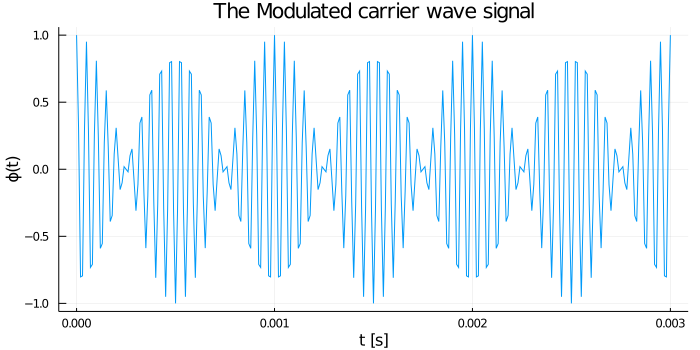

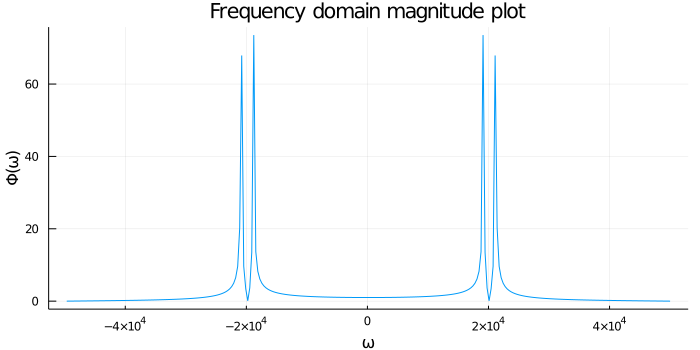

In [36]:
# for the modulated carrier wave signal ϕ(t) = x(t)cos(2πfct)

ϕ = xm .* xc 

fig = plot(t, ϕ,
    title = "The Modulated carrier wave signal",
    xlabel = "t [s]", 
    ylabel = "ϕ(t)")

display(fig)

#in the frequency domain
Φ = fft(ϕ)

fig = plot(ω, fftshift(abs.(Φ)),
    title = "Frequency domain magnitude plot",  
    xlabel = "ω", 
    ylabel = "Φ(ω)")

display(fig);

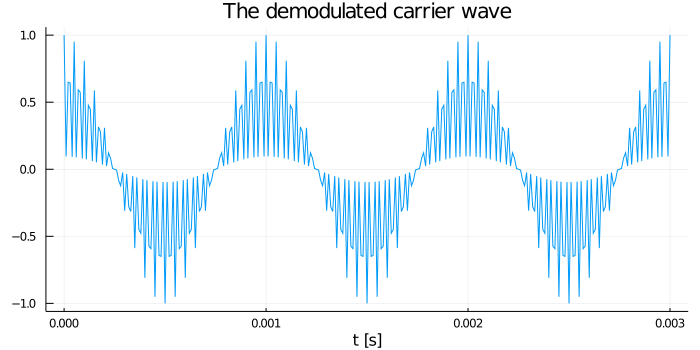

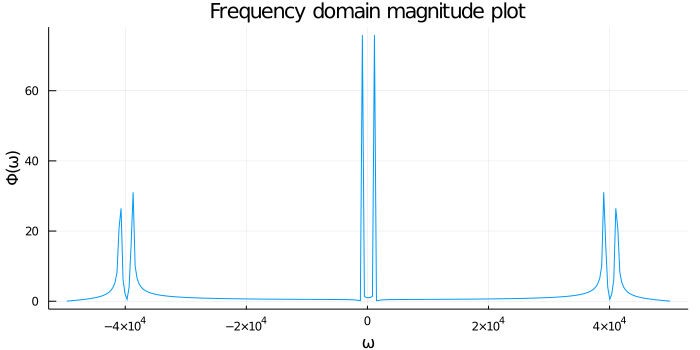

In [37]:
# for the demodulated carrier wave: ϕ(t)cos(2πfct)

v = ϕ .* xc

fig = plot(t, v,
    title = "The demodulated carrier wave",
    ylabel = "",
    xlabel = "t [s]")
display(fig)

#in the frequency domain
V = fft(ϕ .* xc)

fig = plot(ω, fftshift(abs.(V)),
    title = "Frequency domain magnitude plot",  
    xlabel = "ω", 
    ylabel = "Φ(ω)")
display(fig);

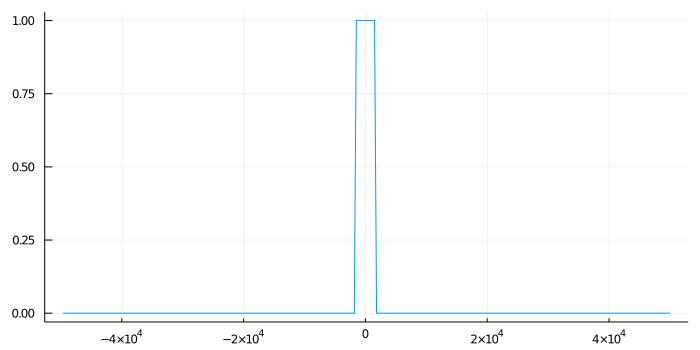

In [38]:
rect(t) = (abs.(t).<=0.5)*1.0 ; # A filter

display(plot(ω, rect.(ω ./3e3)))

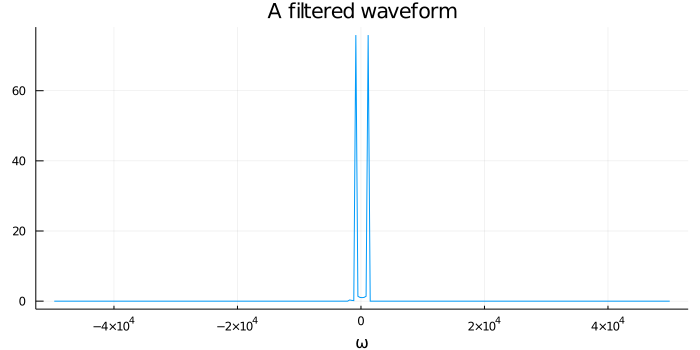

In [39]:
# A Low Pass Filtered waveform

H = rect(ω ./3e3)

Y = fftshift(H) .* V

fig = plot(ω,fftshift(abs.(Y)),
    title = "A filtered waveform",
    ylabel = "",
    xlabel = "ω")    # H in this case is purely real.

display(fig);

 ## Show simulations for the DSB-LC case:


DSB-LC with the following parameters:

Modulating waveform: f(t) = k cos(2πfmt) where fm=1 kHz and k is a constant (k<A).

Carrier wave oscillator: cos(2πfct) where fc=20 kHz.

Modulated carrier wave signal: ϕ(t) = Acos(2πfct) + f(t) cos(2πfct) where A is a constant.
- Let A=1 for these simulations. Initially, let k=0.5

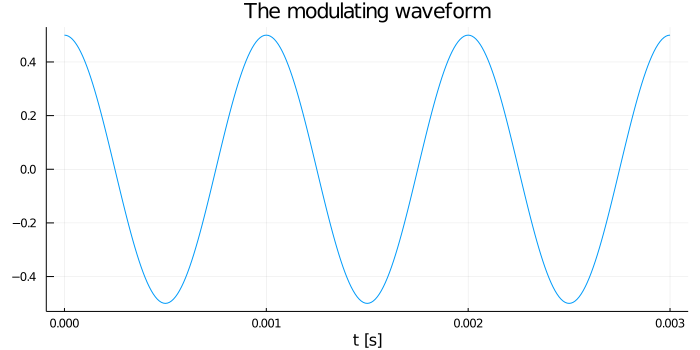

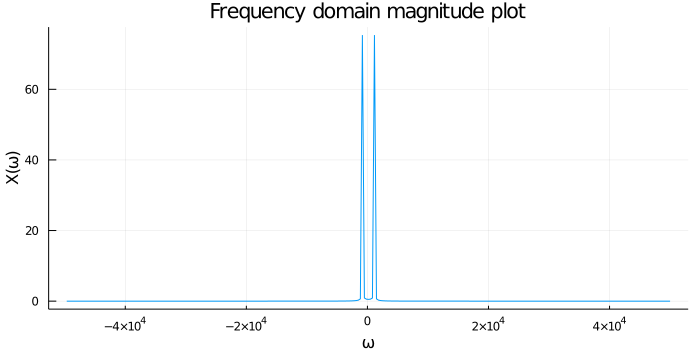

In [40]:
# for the modulating waveform fm = 1kHz 

k = 0.5
A = 1

xm_lc = k .* xm 

fig  = plot(t, xm_lc,
    title = "The modulating waveform",
    ylabel = "",
    xlabel = "t [s]")

display(fig);

XM_lc = fft(xm_lc)

fig = plot(ω, fftshift(abs.(XM_lc)),
    title = "Frequency domain magnitude plot",  
    xlabel = "ω", 
    ylabel = "X(ω)")

display(fig);

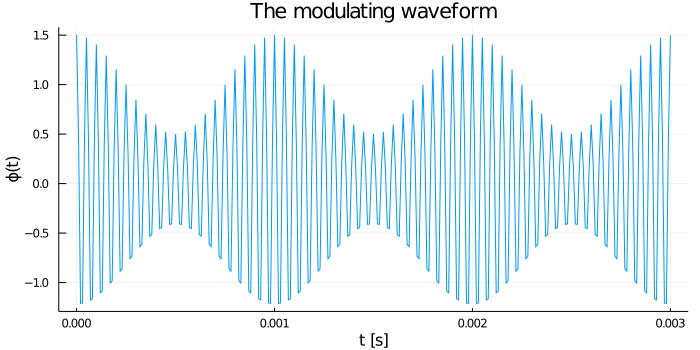

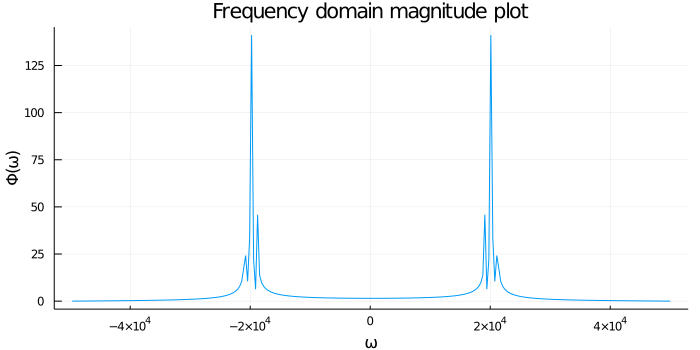

In [41]:
# for the modulated carrier wave ϕ(t)

ϕ_lc = A .* xc + xm_lc .* xc

fig = plot(t, ϕ_lc,
    title = "The modulating waveform",
    ylabel = "ϕ(t)",
    xlabel = "t [s]")

display(fig);

Φ_lc = fft(ϕ_lc)

fig = plot(ω, fftshift(abs.(Φ_lc)),
    title = "Frequency domain magnitude plot",  
    xlabel = "ω", 
    ylabel = "Φ(ω)")
display(fig);

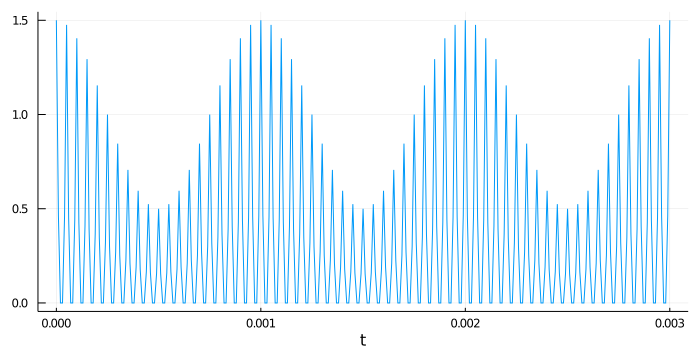

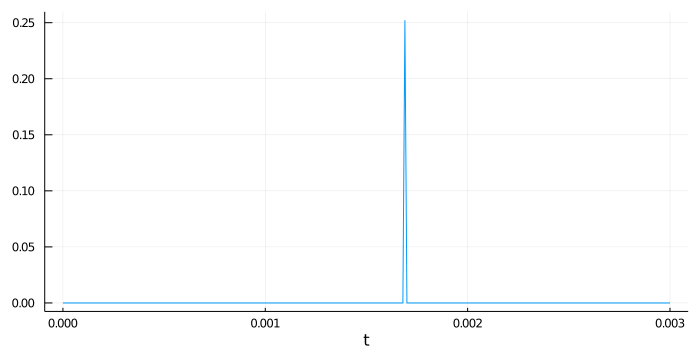

In [42]:
# for the demodulation of the DSB-LC AM signal.

#Δt = 0.001 
#Δω = 2*pi/(N*Δt)   # Sample spacing in freq domain in rad/s
#ω = 0:Δω:(N-1)*Δω

Tperiod = 0.001 #Tperiod = 0.05  # Period of pulse train
B = 100

ω0 = 2*π/Tperiod 
H = rect((ω .- ω0)/(2*π*B)) + rect( (ω .+ (ω0 .- 2*π/Δt) )/(2*π*B) )

#output_of_rectifier = abs.(ϕ)
half_rect = ϕ_lc.*(ϕ_lc.>0);

output_of_filter = real( ifft( fft(half_rect.*H )));



fig  = plot(t, half_rect,
    title = "",
    ylabel = "",
    xlabel = "t")

display(fig);

fig  = plot(t, output_of_filter,
    title = "",
    ylabel = "",
    xlabel = "t")

display(fig);


Extend your simulation to include the addition Gaussian noise to the signal going into the
demodulator.

Plot a histogram of the array.
Display the fft of the noise. It should be wide bandwidth white noise.
Display the noisy AM signal and below it, the output of the demodulator.
Questions: (1) What effect does a phase shift error have on the output SNR? Try 85 deg.
Note: In practice, there will usually be some bandlimiting of the noise before it reaches the
demodulator.
(If the noise is bandlimited to the bandwidth of the modulating waveform, then SNRo = 2xSNRi
as discussed in the lecture notes on SNR in AM.)
(2) How would you calculate the SNR at the output of the demodulator? Describe how you would
you do it in Julia? (You are not required to actually do it – just outline how.)


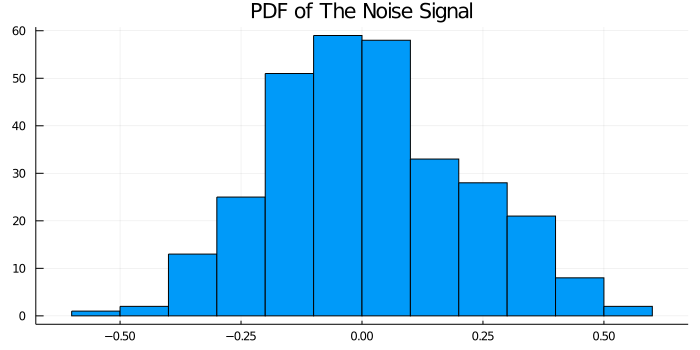

In [43]:
σ = 0.2
N = length(t)
noise = σ * randn(N); 

figure1 = histogram(noise, bins = 10, title = "PDF of The Noise Signal" );
display(figure1);

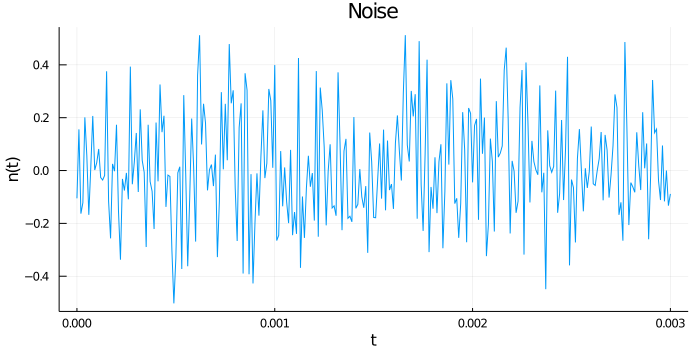

In [46]:
fig = plot(t, noise,
    title = "Noise",
    ylabel = "n(t)",
    xlabel = "t");

display(fig)

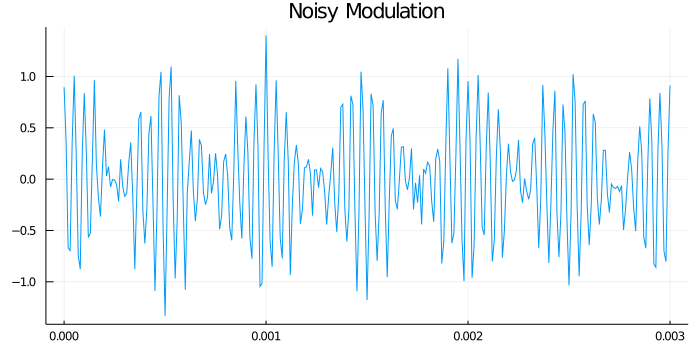

In [47]:
f_tn = xm .+ noise;
ϕ_n = f_tn .* xc;
fig = plot(t, ϕ_n, 
    title = "Noisy Modulation")
display(fig);